## Numerical Results for An Intuitive Example for IRC Solver

40 iterations of state space
policy: ['D' 'L' 'U' 'U' 'U' 'U' 'R' 'U' 'U' 'U']


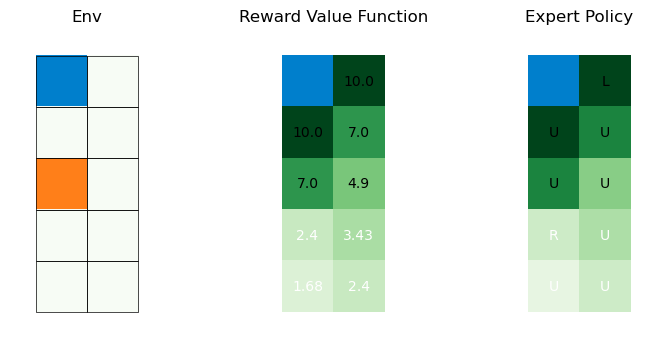

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib.patches as patches

# Ignore all warnings globally
warnings.filterwarnings("ignore")

class GridWorld(object):
    def __init__(self, gridSize, items):
        self.step_reward = 0
        self.m = gridSize[0]
        self.n = gridSize[1]
        self.grid = np.zeros(gridSize)
        self.items = items

        self.state_space = list(range(self.m * self.n))

        self.action_space = {'U': -self.m, 'D': self.m, 'L': -1, 'R': 1}
        self.action_vec = {'U': 0, 'D': 1, 'L': 2, 'R': 3}
        self.actions = ['U', 'D', 'L', 'R']

        self.P, self.reward_dict = self.int_P()
        # self.P1 = {}

    def int_P(self):
        P = {}
        reward_dict = {}
        for state in self.state_space:
            for action in self.actions:
                reward = self.step_reward
                n_state = state + self.action_space[action]

                if self.check_move(n_state, state):
                    n_state = state
                elif n_state in self.items.get('fire').get('loc'):
                    reward += self.items.get('fire').get('reward')
                elif n_state in self.items.get('water').get('loc'):
                    reward += self.items.get('water').get('reward')

                P[(state, action)] = (n_state, reward)
                reward_dict[n_state] = reward
                
        return P, reward_dict

    def check_terminal(self, state):
        # return state in self.items.get('fire').get('loc') + self.items.get('water').get('loc')
        return state in self.items.get('water').get('loc')

    def check_move(self, n_state, oldState):
        if n_state not in self.state_space:
            return True
        elif oldState % self.m == 0 and n_state % self.m == self.m - 1 and abs(oldState//self.m-n_state//self.m)==1:
            # print('oldState0', oldState, 'n_state0', n_state)
            return True
        elif oldState % self.m == self.m - 1 and n_state % self.m == 0 and abs(oldState//self.m-n_state//self.m)==1:
            # print('oldState1', oldState, 'n_state1', n_state)
            return True
        else:
            return False

def plot_value_and_policy(v, policy, grid):
    v = np.reshape(v, (grid.n, grid.m))
    policy = np.reshape(policy, (grid.n, grid.m))

    cmap = plt.cm.get_cmap('Greens', 100)
    norm = plt.Normalize(0, 0)
    rgba = cmap(norm(v))

    for w in grid.items.get('water').get('loc'):
        idx = np.unravel_index(w, v.shape)
        rgba[idx] = 0.0, 0.5, 0.8, 1.0

    for f in grid.items.get('fire').get('loc'):
        idx = np.unravel_index(f, v.shape)
        rgba[idx] = 1.0, 0.5, 0.1, 1.0

    cmap_v = plt.cm.get_cmap('Greens', 100)
    norm_v = plt.Normalize(v.min(), v.max())
    rgba_v = cmap_v(norm_v(v))

    for w in grid.items.get('water').get('loc'):
        idx = np.unravel_index(w, v.shape)
        rgba_v[idx] = 0.0, 0.5, 0.8, 1.0

    cmap_policy = plt.cm.get_cmap('Greens', 10)
    norm_policy = plt.Normalize(v.min(), v.max())
    rgba_policy = cmap_policy(norm_policy(v))

    for w in grid.items.get('water').get('loc'):
        idx = np.unravel_index(w, v.shape)
        rgba_policy[idx] = 0.0, 0.5, 0.8, 1.0

    fig, axs = plt.subplots(1, 3, figsize=(9, 4))

    # Plot source env
    im_v = axs[0].imshow(rgba, interpolation='nearest')
    # axs[0].set_aspect('equal')
    for i in range(v.shape[0]):
        for j in range(v.shape[1]):
            rect = patches.Rectangle((j-0.5, i-0.5), 1, 1, linewidth=0.5, edgecolor='black', facecolor='none')
            axs[0].add_patch(rect)
    #         c = 'w' if v[i, j] < 4 else 'k'
    #         if v[i, j] != 0:
    #             axs[0].text(j, i, np.round(v[i, j], 2), ha="center", va="center", color=c)
    axs[0].set_xlim(-1, grid.m)
    axs[0].set_ylim(grid.n, -1)
    axs[0].axis('off')
    axs[0].set_title('Env')

    # Plot value function
    im_v = axs[1].imshow(rgba_v, interpolation='nearest')
    for i in range(v.shape[0]):
        for j in range(v.shape[1]):
            c = 'w' if v[i, j] < 4 else 'k'
            if v[i, j] != 0:
                axs[1].text(j, i, np.round(v[i, j], 2), ha="center", va="center", color=c)
    axs[1].set_xlim(-1, grid.m)
    axs[1].set_ylim(grid.n, -1)
    axs[1].axis('off')
    axs[1].set_title('Reward Value Function')

    # Plot policy
    im_policy = axs[2].imshow(rgba_policy, interpolation='nearest')
    for i in range(policy.shape[0]):
        for j in range(policy.shape[1]):
            c = 'w' if v[i, j] < 4 else 'k'
            if v[i, j] != 0:
                axs[2].text(j, i, policy[i, j], ha="center", va="center", color=c)
    axs[2].set_xlim(-1, grid.m)
    axs[2].set_ylim(grid.n, -1)
    axs[2].axis('off')
    axs[2].set_title('Expert Policy')
    plt.savefig('IRC.jpg', bbox_inches='tight', dpi=800)
    plt.show()

def plot_value_and_policy_generated(v, policy, grid):
    v = np.reshape(v, (grid.n, grid.m))
    policy = np.reshape(policy, (grid.n, grid.m))

    cmap = plt.cm.get_cmap('Greens', 100)
    norm = plt.Normalize(0, 0)
    rgba = cmap(norm(v))

    for w in grid.items.get('water').get('loc'):
        idx = np.unravel_index(w, v.shape)
        rgba[idx] = 0.0, 0.5, 0.8, 1.0

    for f in grid.items.get('fire').get('loc'):
        idx = np.unravel_index(f, v.shape)
        rgba[idx] = 1.0, 0.5, 0.1, 1.0

    cmap_v = plt.cm.get_cmap('Greens', 100)
    norm_v = plt.Normalize(v.min(), v.max())
    rgba_v = cmap_v(norm_v(v))

    for w in grid.items.get('water').get('loc'):
        idx = np.unravel_index(w, v.shape)
        rgba_v[idx] = 0.0, 0.5, 0.8, 1.0

    cmap_policy = plt.cm.get_cmap('Greens', 10)
    norm_policy = plt.Normalize(v.min(), v.max())
    rgba_policy = cmap_policy(norm_policy(v))

    for w in grid.items.get('water').get('loc'):
        idx = np.unravel_index(w, v.shape)
        rgba_policy[idx] = 0.0, 0.5, 0.8, 1.0

    fig, axs = plt.subplots(1, 3, figsize=(9, 4))

    # Plot source env
    im_v = axs[0].imshow(rgba, interpolation='nearest')
    # axs[0].set_aspect('equal')
    for i in range(v.shape[0]):
        for j in range(v.shape[1]):
            rect = patches.Rectangle((j-0.5, i-0.5), 1, 1, linewidth=0.5, edgecolor='black', facecolor='none')
            axs[0].add_patch(rect)
    #         c = 'w' if v[i, j] < 4 else 'k'
    #         if v[i, j] != 0:
    #             axs[0].text(j, i, np.round(v[i, j], 2), ha="center", va="center", color=c)
    axs[0].set_xlim(-1, grid.m)
    axs[0].set_ylim(grid.n, -1)
    axs[0].axis('off')
    axs[0].set_title('Env')

    # Plot value function
    im_v = axs[1].imshow(rgba_v, interpolation='nearest')
    for i in range(v.shape[0]):
        for j in range(v.shape[1]):
            c = 'w' if v[i, j] < 4 else 'k'
            if v[i, j] != 0:
                axs[1].text(j, i, np.round(v[i, j], 2), ha="center", va="center", color=c)
    axs[1].set_xlim(-1, grid.m)
    axs[1].set_ylim(grid.n, -1)
    axs[1].axis('off')
    axs[1].set_title('Reward Value Function')

    # Plot policy
    im_policy = axs[2].imshow(rgba_policy, interpolation='nearest')
    for i in range(policy.shape[0]):
        for j in range(policy.shape[1]):
            c = 'w' if v[i, j] < 4 else 'k'
            if v[i, j] != 0:
                axs[2].text(j, i, policy[i, j], ha="center", va="center", color=c)
    axs[2].set_xlim(-1, grid.m)
    axs[2].set_ylim(grid.n, -1)
    axs[2].axis('off')
    axs[2].set_title('Expert Policy')
    plt.savefig('IRC.jpg', bbox_inches='tight', dpi=800)
    plt.show()


def interate_values(grid, v, policy, gamma, theta, p_stoch, add_sto, sto):
    converged = False
    i = 0
    sp = p_stoch
    p = {'U': [sp+(1-sp)/4, (1-sp)/4, (1-sp)/4, (1-sp)/4],
         'D': [(1-sp)/4, sp+(1-sp)/4, (1-sp)/4, (1-sp)/4],
         'L': [(1-sp)/4, (1-sp)/4, sp+(1-sp)/4, (1-sp)/4],
         'R': [(1-sp)/4, (1-sp)/4, (1-sp)/4, sp+(1-sp)/4]}
    sp_m = sp - sto
    p_m = {'U': [sp_m+(1-sp_m)/4, (1-sp_m)/4, (1-sp_m)/4, (1-sp_m)/4],
         'D': [(1-sp_m)/4, sp_m+(1-sp_m)/4, (1-sp_m)/4, (1-sp_m)/4],
         'L': [(1-sp_m)/4, (1-sp_m)/4, sp_m+(1-sp_m)/4, (1-sp_m)/4],
         'R': [(1-sp_m)/4, (1-sp_m)/4, (1-sp_m)/4, sp_m+(1-sp_m)/4]}

    P_sa_ns = {}
    Q_sa = {}
    reward_sa = {}
    flag = False
    while not converged:
        DELTA = 0
        for state in grid.state_space:
            i += 1
            if grid.check_terminal(state):
                v[state] = 0

            else:
                old_v = v[state]
                new_v = []
                for action in grid.actions:
                    new_v_p = []
                    if not flag: reward_sa[(state, action)] = 0
                    for idx, action_p in enumerate(grid.actions):
                        (n_state, reward) = grid.P.get((state, action_p))
                        if add_sto:
                            if state in [1,3,7,9]: # add more stochasticity to safe optimal path
                                new_v_p.append(p_m.get(action)[idx] * (reward + (gamma * v[n_state])))
                                if not flag: 
                                    reward_sa[(state, action)] += p_m.get(action)[idx] * (reward)
                                    if (state,action,n_state) in P_sa_ns.keys():
                                        P_sa_ns[(state,action,n_state)] += p_m.get(action)[idx]
                                    else: P_sa_ns[(state,action,n_state)] = p_m.get(action)[idx]
                            else:
                                new_v_p.append(p.get(action)[idx] * (reward + (gamma * v[n_state])))
                                if not flag:
                                    reward_sa[(state, action)] += p.get(action)[idx] * (reward)
                                    if (state,action,n_state) in P_sa_ns.keys():
                                        P_sa_ns[(state,action,n_state)] += p.get(action)[idx] 
                                    else: P_sa_ns[(state,action,n_state)] = p.get(action)[idx]
                        else: 
                            new_v_p.append(p.get(action)[idx] * (reward + (gamma * v[n_state])))
                            if not flag:
                                # print('reward',(state,action),reward)
                                reward_sa[(state, action)] += p.get(action)[idx] * (reward)
                                # print(reward_sa[(state, action)])
                                if (state,action,n_state) in P_sa_ns.keys():
                                    P_sa_ns[(state,action,n_state)] += p.get(action)[idx] 
                                else: P_sa_ns[(state,action,n_state)] = p.get(action)[idx]

                    new_v.append(sum(new_v_p))

                v[state] = max(new_v)

                DELTA = max(DELTA, np.abs(old_v - v[state]))
                converged = True if DELTA < theta else False
                
        flag = True

    for state in grid.state_space:
        i += 1
        new_qs = []

        for action in grid.actions:
            # (n_state, reward) = grid.P.get((state, action))
            # new_vs.append(reward + gamma * v[n_state])
            new_v_p = []

            for idx, action_p in enumerate(grid.actions):
                (n_state, reward) = grid.P.get((state, action_p))
                if add_sto:
                    if state in [1,3,7,9]: # add more stochasticity to safe optimal path
                        new_v_p.append(p_m.get(action)[idx] * (reward + (gamma * v[n_state])))
                    else:
                        new_v_p.append(p.get(action)[idx] * (reward + (gamma * v[n_state])))
                else: 
                    new_v_p.append(p.get(action)[idx] * (reward + (gamma * v[n_state])))         

            # print('new_v_p',new_v_p)
            new_qs.append(sum(new_v_p))
        new_qs = np.array(new_qs)
        # print('new_qs',new_qs)
        best_action_idx = np.where(new_qs == new_qs.max())[0]
        policy[state] = grid.actions[best_action_idx[0]]

    print(i, 'iterations of state space')
    # print(P_sa_ns)
    reward_vec = np.zeros(len(grid.state_space)*len(grid.action_space))
    for (state, action) in reward_sa.keys():
        reward_vec[state*4 + grid.action_vec[action]] = reward_sa[(state, action)]
    return v, policy, P_sa_ns, reward_vec

#### plot the expert policy
if __name__ == '__main__':

    # if we only change the reward function (p=0.9), fire reward -3 is feasible with water reward 10, but infeasible with water reward 20
    # if we only change the transition (fire reward -3 and water reward 10), add sto=0.3 becomes infeasible
    grid_size = (2, 5)
    items = {'fire': {'reward': -3, 'loc': [4]},
             'water': {'reward': 10, 'loc': [0]}}

    gamma = 0.7
    theta = 1e-12
    p_stoch = 1

    v = np.zeros(np.prod(grid_size))
    policy = np.full(np.prod(grid_size), 'n')

    env = GridWorld(grid_size, items)

    v, policy, P_sa_ns, reward_vec = interate_values(env, v, policy, gamma, theta, p_stoch, add_sto=False, sto=0.3)

    print('policy:', policy)
    
    plot_value_and_policy(v, policy, env)

    # print(reward_vec.reshape(-1,4))


180 iterations of state space
policy: ['D' 'L' 'U' 'L' 'U' 'U' 'U' 'U' 'U' 'U']


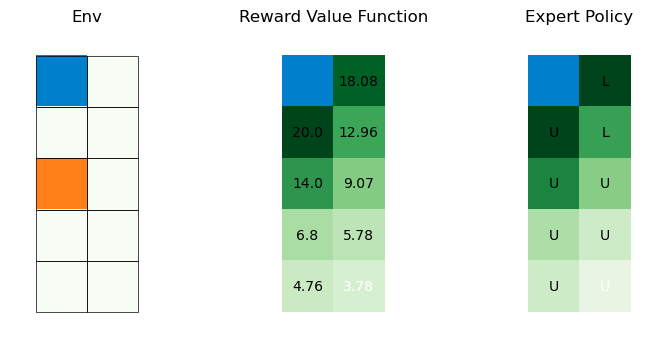

In [13]:
# input: transition matrix ((s,a)->s'), policy matrix
# output: transition matrix ((s,a)->(s',a'))
# state_to_vec: [0, 1, 2, ...]->[0, 1, 2, ..]
# action_to_vec: ['U', 'D', 'L', 'R']->[0, 1, 2, 3]

def calculate_transition_matrix(policy, grid, p_stoch, P_sa_ns_mat):
    """
    Calculate the transition matrix from state-action to state-action.

    Parameters:
    - P_sa_ns (numpy.ndarray): Transition matrix from state-action to next state.
    - policy (numpy.ndarray): Policy matrix from state to action.

    Returns:
    - P_sasa (numpy.ndarray): Transition matrix from state-action to state-action with shape (S×A, S×A).
    """
    sp = p_stoch
    p = {'U': [sp+(1-sp)/4, (1-sp)/4, (1-sp)/4, (1-sp)/4],
         'D': [(1-sp)/4, sp+(1-sp)/4, (1-sp)/4, (1-sp)/4],
         'L': [(1-sp)/4, (1-sp)/4, sp+(1-sp)/4, (1-sp)/4],
         'R': [(1-sp)/4, (1-sp)/4, (1-sp)/4, sp+(1-sp)/4]}
    
    P_sasa = np.zeros((len(grid.state_space)*len(grid.action_space),len(grid.state_space)*len(grid.action_space)))
    P_sa_ns = 0
    for state in grid.state_space:
        for action in grid.actions:
            for next_state in grid.state_space:
                for next_action in grid.actions:
                    if state != 0:
                        if (state,action,next_state) in P_sa_ns_mat.keys():
                            P_sa_ns = P_sa_ns_mat[(state,action,next_state)]
                        else:
                            P_sa_ns = 0 
                    policy_sa = 1 if next_action == policy[next_state] else 0
                    P_sasa[state*len(grid.action_space)+grid.action_vec[action], next_state*len(grid.action_space)+grid.action_vec[next_action]] += P_sa_ns * policy_sa
                    for i in range(len(grid.action_space)):
                        P_sasa[i,i] = 1

    return P_sasa

def cal_Q_from_V(v, P_sa_ns_mat, grid, gamma):
    Q = np.zeros(len(v)*4)
    for (s,a,ns) in P_sa_ns_mat.keys():
        Q[s*4+grid.action_vec[a]] += P_sa_ns_mat[(s,a,ns)] * (grid.reward_dict[ns] + gamma * v[ns])
    # print('hhhhh\n', grid.reward_dict, v)
    # print(Q.reshape(-1,4))
    return Q
    
#### plot the generated policy
if __name__ == '__main__':

    # if we only change the reward function (p=0.9), fire reward -3 is feasible with water reward 10, but infeasible with water reward 20
    # if we only change the transition (fire reward -3 and water reward 10), add sto=0.3 becomes infeasible
    grid_size = (2, 5)
    items = {'fire': {'reward': -3, 'loc': [4]},
             'water': {'reward': 20, 'loc': [0]}}

    gamma = 0.7
    theta = 1e-12
    p_stoch = 1

    v = np.zeros(np.prod(grid_size))
    policy = np.full(np.prod(grid_size), 'n')

    env = GridWorld(grid_size, items)

    v, policy, P_sa_ns, reward_vec = interate_values(env, v, policy, gamma, theta, p_stoch, add_sto=True, sto=0.3)

    print('policy:', policy)
    
    plot_value_and_policy_generated(v, policy, env)

    # print(reward_vec.reshape(-1,4))

In [14]:
#### validation of the theorem
#### different reward, different transition, same expert policy

if __name__ == '__main__':
    grid_size = (2, 5)
    items_old = {'fire': {'reward': -3, 'loc': [4]},
             'water': {'reward': 10, 'loc': [0]}}
    items_new = {'fire': {'reward': -3, 'loc': [4]},
             'water': {'reward': 20, 'loc': [0]}}

    gamma = 0.7
    theta = 1e-10
    p_stoch = 1

    critical_loc = 6

    v = np.zeros(np.prod(grid_size))
    v_new = np.zeros(np.prod(grid_size))
    policy = np.full(np.prod(grid_size), 'n')
    policy_new = np.full(np.prod(grid_size), 'n')

    env = GridWorld(grid_size, items_old)
    env_new = GridWorld(grid_size, items_new)

    v, policy, P_sa_ns_mat, reward_vec = interate_values(env, v, policy, gamma, theta, p_stoch, add_sto=False, sto=0.3)
    _, _, P_sa_ns_mat_new, reward_vec_new = interate_values(env_new, v_new, policy_new, gamma, theta, p_stoch, add_sto=True, sto=0.3)
    # print('v', v, 'P_sa_ns_mat', P_sa_ns_mat)

    p_sa_nsna = calculate_transition_matrix(policy, env, p_stoch, P_sa_ns_mat)
    p_sa_nsna_new = calculate_transition_matrix(policy, env_new, p_stoch, P_sa_ns_mat_new)
    # print(P_sa_ns_mat_new)
    # print(np.sum(p_sa_nsna,axis=1))
    # print(np.sum(p_sa_nsna))
    
    Y = np.eye(p_sa_nsna.shape[0])-0.7*p_sa_nsna
    Y_prime = np.eye(p_sa_nsna_new.shape[0])-0.7*p_sa_nsna_new
    Q = cal_Q_from_V(v, P_sa_ns_mat, env, gamma)
    # print(Q)
    transition_shift = np.linalg.inv(Y_prime)@(Y-Y_prime)@Q
    reward_shift = np.linalg.inv(Y_prime)@np.array(reward_vec_new-reward_vec)
    transition_shift += reward_shift
    
    print('Q^r(a^E)-Q^r(a^C):', Q[critical_loc*4+3]-Q[critical_loc*4+0])
    print('Q^r(a^E)-Q^r(a^O):', Q[critical_loc*4+3]-Q[critical_loc*4+1], Q[critical_loc*4+3]-Q[critical_loc*4+2])
    print("(Y\')^(-1)(Y-Y\')Q^r[a^C-a^E]", transition_shift[critical_loc*4+0] - transition_shift[critical_loc*4+3])
    print('Q^r(a^O)-Q^r(a^C):', Q[critical_loc*4+1]-Q[critical_loc*4+0], Q[critical_loc*4+2]-Q[critical_loc*4+0])
    print("(Y\')^(-1)(Y-Y\')Q^r[a^C-a^O]", transition_shift[critical_loc*4+0] - transition_shift[critical_loc*4+1], transition_shift[critical_loc*4+0] - transition_shift[critical_loc*4+2])

40 iterations of state space
160 iterations of state space
Q^r(a^E)-Q^r(a^C): 0.5009999999999999
Q^r(a^E)-Q^r(a^O): 1.2245099999999998 0.7202999999999999
(Y')^(-1)(Y-Y')Q^r[a^C-a^E] 3.7005647247429003
Q^r(a^O)-Q^r(a^C): -0.7235099999999999 -0.21930000000000005
(Y')^(-1)(Y-Y')Q^r[a^C-a^O] 4.312276715124022 4.0603953073200305
